## Problem Statement

Machine Translation is the automated translation of source material into another language without human 
intervention. This problem mainly focusses on language translation between European language pairs. 

We need to present and submit a project report which consist of shared task for the language pair EN→DE. 
Our objective is to design a Machine Translation model that can be used to translate sentences from English language to German language. In this process we are supposed to use data from three different databases, which are sourced from different events.

#### Objective:

Design a Machine Translation model that can be used to translate sentences from German language to English language or vice-versa.

#### Package version
    pandas==1.0.5
    numpy==1.18.5
    matplotlib==3.2.2


### Milestone 2 [ 15 Points ]
1. Step 2: Import and merge all the three datasets. [ 2 points ]
2. Step 3: Data cleansing and EDA [ 3 points ]
3. Step 4: NLP pre processing - Dataset suitable to be used for AIML model learning [ 5 points 

In [1]:
#Step 2: Import and merge all the three datasets. [ 2 points ]
# Import basic libraries to load the requried data and to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings


import unicodedata
import re
import numpy as np
import os
import io
import time

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#DeepLearning_Project2
path_to_file_europarl_en_de = 'europarl-v7_en_de.txt'
path_to_file_europarl_de_en = 'europarl-v7_de_en.txt'
path_to_file_news_en_de = 'news-commentary-v9_en_de.txt'
path_to_file_news_de_en = 'news-commentary-v9_de_en.txt'
# Let's create data for 10 examples to visualize
#create_dataset(path_to_file, num_examples=10)

In [4]:
# Note we have reduced the data set to 50K+,50K+ and 25+K Lines considering timelines, resources and cleaned up of garbage data  
# Read the text file content data into Dataframes using pandas libraries.
#----------------------------------------------------------------------------------------------------#
en_europarl_df0 = pd.read_table(path_to_file_europarl_en_de, header=None, names=['EN_Euro_Parl'], encoding='utf-8')
de_europarl_df0 = pd.read_table(path_to_file_europarl_de_en, header=None, names=['DE_Euro_Parl'], encoding='utf-8')

#---------------------------------------------------------------------------------------------------#
#en_commoncrawl_df0 = pd.read_table('commoncrawl.de-en.en', header=None, names=['EN_Commoncrawl'], encoding='utf-8')
#de_commoncrawl_df0 = pd.read_table('commoncrawl.de-en.de', header=None, names=['DE_Commoncrawl'], encoding='utf-8')
#--------------------------------------------------------------------------------------------------#

en_news_commentary_df0 = pd.read_table(path_to_file_news_en_de, header=None, encoding='utf-8',
                                      lineterminator='\n',names=['EN_News_commentary'])
de_news_commentary_df0 = pd.read_table(path_to_file_news_de_en, header=None, encoding='utf-8',
                                      lineterminator='\n',names=['DE_News_commentary'])
#--------------------------------------------------------------------------------------------------#

In [5]:
print('\n--------------------------------------------------------\n')
print("English_News_Count: ",en_europarl_df0.count())
print("German_News_Count:  ",de_europarl_df0.count())
print('\n--------------------------------------------------------\n')
#print("English_Commoncrawl_Count: ",en_commoncrawl_df0.count())
#print("German_Commoncrawl_Count:  ",de_commoncrawl_df0.count())
print('\n--------------------------------------------------------\n')
# We can observe even after spliting the data default at '/n' character only,
# the number of rows on EN and DE side are not matching.
print("English_News_Count: ",en_news_commentary_df0.count())
print("German_News_Count:  ",de_news_commentary_df0.count())
print('\n--------------------------------------------------------\n')
# Same trend of not matching rowcount for EN and DE is obsereved, in this europarl set as well.


--------------------------------------------------------

English_News_Count:  EN_Euro_Parl    49781
dtype: int64
German_News_Count:   DE_Euro_Parl    49901
dtype: int64

--------------------------------------------------------


--------------------------------------------------------

English_News_Count:  EN_News_commentary    19975
dtype: int64
German_News_Count:   DE_News_commentary    19966
dtype: int64

--------------------------------------------------------



#### Step 4: NLP pre processing - Dataset suitable to be used for AIML model learning [ 5 points ]
1. We need to work/observe/correct data before loading to python itself.
2. We Manually selected right set of sample data and compared the loaded counts for each line.

In [6]:
# open the sampled file : europarl_en, 
file_europarl_en = open(path_to_file_europarl_en_de, encoding='utf-8')
file_europarl_de = open(path_to_file_europarl_de_en, encoding='utf-8')
# read the content of the file opened
europarl_en = file_europarl_en.readlines()
europarl_de = file_europarl_de.readlines()
en_europarl_df = pd.DataFrame(europarl_en, columns=['EN_Euro_Parl'])
de_europarl_df = pd.DataFrame(europarl_de, columns = ['DE_Euro_Parl'])
##----------------------------------------------------------------##  
# open the sampled file : commoncrawl_en, commoncrawl_de 
'''
file_commoncrawl_en = open('commoncrawl.de-en.en', encoding='utf-8')
file_commoncrawl_de = open('commoncrawl.de-en.de', encoding='utf-8')
# read the content of the file opened
commoncrawl_en = file_commoncrawl_en.readlines()
commoncrawl_de = file_commoncrawl_de.readlines()
en_commoncrawl_df = pd.DataFrame(commoncrawl_en, columns=['EN_commoncrawl'])
de_commoncrawl_df = pd.DataFrame(commoncrawl_de, columns=['DE_commoncrawl'])
'''
##----------------------------------------------------------------##
# open the sampled file : commoncrawl_en, commoncrawl_de 
file_news_commentary_en = open(path_to_file_news_en_de, encoding='utf-8')
file_news_commentary_de = open(path_to_file_news_de_en, encoding='utf-8')
# read the content of the file opened
news_commentary_en = file_news_commentary_en.readlines()
news_commentary_de = file_news_commentary_de.readlines()
en_news_commentary_df = pd.DataFrame(news_commentary_en, columns=['EN_News_Commentary'])
de_news_commentary_df = pd.DataFrame(news_commentary_de, columns=['DE_News_Commentary'])
##----------------------------------------------------------------##
print('\n--------------------------------------------------------\n')
print("English_News_Count: ",en_europarl_df.count())
print("German_News_Count:  ",de_europarl_df.count())
print('\n--------------------------------------------------------\n')
# We can observe with UTF encoding and reading the file with stream/list appraoch we were able to success fully load 
# test data into pandas dataframe. 
'''
print("English_Commoncrawl_Count: ",en_commoncrawl_df.count())
print("German_Commoncrawl_Count:  ",de_commoncrawl_df.count())
'''
print('\n--------------------------------------------------------\n')
# the number of rows on EN and DE side are matching.
print("English_News_Count: ",en_news_commentary_df.count())
print("German_News_Count:  ",de_news_commentary_df.count())
print('\n--------------------------------------------------------\n')
# Same trend of matching rowcount for EN and DE is obsereved, in this news commentry set as well.


--------------------------------------------------------

English_News_Count:  EN_Euro_Parl    50001
dtype: int64
German_News_Count:   DE_Euro_Parl    50001
dtype: int64

--------------------------------------------------------


--------------------------------------------------------

English_News_Count:  EN_News_Commentary    20001
dtype: int64
German_News_Count:   DE_News_Commentary    20001
dtype: int64

--------------------------------------------------------



In [7]:
#Merge En and DE based DF into one DF
#------------------------------------------------------------------------------------------#
news_commentary_df =  pd.DataFrame()
en_news_commentary_df.join(de_news_commentary_df)
pd.merge(en_news_commentary_df, de_news_commentary_df, left_index=True, right_index=True)
news_commentary_df = pd.merge(en_news_commentary_df, de_news_commentary_df, left_index=True, right_index=True)
#------------------------------------------------------------------------------------------#
'''
en_commoncrawl_df.join(de_commoncrawl_df)
pd.merge(en_commoncrawl_df, de_commoncrawl_df, left_index=True, right_index=True)
commoncrawl_df = pd.concat([en_commoncrawl_df, de_commoncrawl_df], axis=1)
'''
#------------------------------------------------------------------------------------------#
en_europarl_df.join(de_europarl_df)
pd.merge(en_europarl_df, de_europarl_df, left_index=True, right_index=True)
europarl_df = pd.merge(en_europarl_df, de_europarl_df, left_index=True, right_index=True)
#------------------------------------------------------------------------------------------#

In [8]:
#Step 2A: Merge all the three datasets. [ 1 point ]
event_merge_df =  pd.DataFrame()
event_df=  pd.DataFrame()
#------------------------------------------------------------------------------------------#
news_commentary_df.join(europarl_df)
pd.merge(news_commentary_df, europarl_df, left_index=True, right_index=True)
event_merge_df = pd.merge(news_commentary_df, europarl_df, left_index=True, right_index=True)
#------------------------------------------------------------------------------------------#
'''
event_df.join(europarl_df)
pd.merge(event_df, europarl_df, left_index=True, right_index=True)
event_merge_df = pd.concat([event_df, europarl_df], axis=1)
'''
#------------------------------------------------------------------------------------------#
#Free up non-used default allocated memory
#del [event_df]

'\nevent_df.join(europarl_df)\npd.merge(event_df, europarl_df, left_index=True, right_index=True)\nevent_merge_df = pd.concat([event_df, europarl_df], axis=1)\n'

In [9]:
event_merge_df.head(100)

EN_News_Commentary  \
0                                     $10,000 Gold?\n   
1   SAN FRANCISCO – It has never been easy to have...   
2   Lately, with gold prices up more than 300% ove...   
3   Just last December, fellow economists Martin F...   
4                             Wouldn’t you know it?\n   
..                                                ...   
95  The supremacy of EU law would derive not from ...   
96  That is a radical change, not the mere tidying...   
97  I do not believe it is right to make a change ...   
98    Elected parliaments do not own our liberties.\n   
99  They safeguard them, and should not diminish t...   

                                   DE_News_Commentary  \
0                    Steigt Gold auf 10.000 Dollar?\n   
1   SAN FRANCISCO – Es war noch nie leicht, ein ra...   
2   In letzter Zeit allerdings ist dies schwierige...   
3   Erst letzten Dezember verfassten meine Kollege...   
4                 Und es kam, wie es kommen musste.\n   
..                                                ...   
95  Die Vorherrschaft des EU-Rechts würde sich nic...   
96  Das ist eine radikale Veränderung, nicht, wie ...   
97  Meiner Ansicht nach ist es nicht richtig, eine...   
98  Gewählte Parlamente besitzen unsere Freiheiten...   
99  Sie schützen sie und sollten diese Freiheiten ...   

                                         EN_Euro_Parl  \
0                         Resumption of the session\n   
1   I declare resumed the session of the European ...   
2   Although, as you will have seen, the dreaded '...   
3   You have requested a debate on this subject in...   
4   In the meantime, I should like to observe a mi...   
..                                                ...   
95                 There was a vote on this matter.\n   
96  As I recall, the outcome of this vote was 422 ...   
97  This means that all the Groups with the except...   
98   All of the others were of a different opinion.\n   
99                           That was the decision.\n   

                                         DE_Euro_Parl  
0                Wiederaufnahme der Sitzungsperiode\n  
1   Ich erkläre die am Freitag, dem 17. Dezember u...  
2   Wie Sie feststellen konnten, ist der gefürchte...  
3   Im Parlament besteht der Wunsch nach einer Aus...  
4   Heute möchte ich Sie bitten - das ist auch der...  
..                                                ...  
95          Es gab eine Abstimmung zu diesem Punkt.\n  
96  Diese Abstimmung ist meiner Erinnerung nach so...  
97  Das heißt, alle Fraktionen, mit Ausnahme der F...  
98              Alle anderen waren anderer Meinung.\n  
99                            Das war der Beschluß.\n  

[100 rows x 4 columns]

In [10]:
#Step 3: Data cleansing and EDA [ 3 points ]
event_merge_df.info()
# We can observe the merged data set has taken the max index value from DE_Commoncrawl column i.e. 22,94,089.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20001 entries, 0 to 20000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EN_News_Commentary  20001 non-null  object
 1   DE_News_Commentary  20001 non-null  object
 2   EN_Euro_Parl        20001 non-null  object
 3   DE_Euro_Parl        20001 non-null  object
dtypes: object(4)
memory usage: 781.3+ KB


In [11]:
# The line items count excalty matches so we can trust the number of lines and its input records to model
# Lets observe, if last max count record in dataframe
pd.options.display.max_colwidth = 250
event_merge_df.tail(1)

EN_News_Commentary  \
20000  Given the tenuous post-crisis climate, with uncertain demand prospects in the major markets of the developed world, Asia finds itself in a classic policy trap, dragging its feet on monetary tightening while risking the negative impact of stronger...   

                                                                                                                                                                                                                                              DE_News_Commentary  \
20000  Angesichts des prekären Klimas nach der Krise – mit ungewissen Aussichten für die Nachfrage in den Hauptmärkten der Industrieländer – befindet sich Asien nun in einer klassischen strategischen Falle: Es schiebt die restriktive Geldpolitik auf die...   

                                                                                                                                                                                                                                                    EN_Euro_Parl  \
20000  I refer to Article 38 of the territorial requirement which restricts the scope to the territory of the State of Israel and thus does not grant special customs arrangements for products coming from the territories which were occupied by Israeli ar...   

                                                                                                                                                                                                                                                    DE_Euro_Parl  
20000  Die Rede ist von Artikel 38, von der Territorialklausel, welche das Anwendungsgebiet auf das Territorium des Staates Israel begrenzt und somit keine Zollerleichterungen für Erzeugnisse gestattet, die aus den Gebieten stammen, die Israel seit Juni...

### Challanges worked upon
1.  We did worked upon preprocessing of data, as the nth line records are not was maching. We skip the bad lines before loading it in file object and selected right set of sample values to exersize.

In [12]:
#2. Removal of punctuation specific to specific language is also important. 
import string

event_merge_df_trans = str.maketrans('', '', string.punctuation)
event_merge_df_txt = pd.DataFrame({col: event_merge_df[col].str.translate(event_merge_df_trans) for col in event_merge_df})

# We observe the performance of translate method is better as compared to replace so used the same, observing data in place

# Lowercase all characters
event_merge_df_txt.apply(lambda col: col.str.lower())
# However '\n' character we will need to replace specially to get the right set of data ro feed into model
event_merge_df_txt = event_merge_df_txt.replace('\n', '', regex=True)

# Data is ready to feed to model, lets check
event_merge_df_txt

EN_News_Commentary  \
0                                                                                                                                                                                                                                                     10000 Gold   
1                                                                                                                                                                 SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold   
2                                                                                                                                                                           Lately with gold prices up more than 300 over the last decade it is harder than ever   
3                                                                                    Just last December fellow economists Martin Feldstein and Nouriel Roubini each penned opeds bravely questioning bullish market sentiment sensibly pointing out gold’s risks   
4                                                                                                                                                                                                                                           Wouldn’t you know it   
...                                                                                                                                                                                                                                                          ...   
19996   Financial markets appear to be expecting a good deal more Asian monetary tightening – at least that’s the message that can be drawn from sharply appreciating Asian currencies which seem to be responding to prospective moves in policy interest rates   
19997                                                              Relative to the US dollar an equalweighted basket of 10 major Asian currencies excluding Japan has retraced the crisisrelated distortions of 20082009 and has now returned to precrisis highs   
19998                                                                                          Exportled economies of course can’t take currency appreciation lightly – it undermines competitiveness and risks eroding the country’s share of the global market   
19999                                                                                                                                                                                                     It also invites destabilizing hotmoney capital inflows   
20000  Given the tenuous postcrisis climate with uncertain demand prospects in the major markets of the developed world Asia finds itself in a classic policy trap dragging its feet on monetary tightening while risking the negative impact of stronger cur...   

                                                                                                                                                                                                                                              DE_News_Commentary  \
0                                                                                                                                                                                                                                   Steigt Gold auf 10000 Dollar   
1                                                                                                                                                                SAN FRANCISCO – Es war noch nie leicht ein rationales Gespräch über den Wert von Gold zu führen   
2                                                                                                                            In letzter Zeit allerdings ist dies schwieriger denn je ist doch der Goldpreis im letzten Jahrzehnt um über 300 Prozent angestiegen   
3                        Erst letzten Dezember verfassten meine Kollegen Mart

### Milestone 3 [ 15 Points ]
5. Step 5: Design, train and test simple RNN & LSTM model [ 4 points ]
6. Step 6: Design, train and test RNN & LSTM model with embeddings [ 5 points ]
7. Step 7: Share your insights on the results obtained from steps(5-6) [ 1 Points ]
Submission:
 > Interim report along with the notebooks in milestone 3 [ 5 Points]

#### Step 5: Design, train and test simple RNN & LSTM model [ 4 points ]

In [13]:
# Let's add start and end to sentances, this will enable to identify words and end of transaltions for target column
event_merge_df_txt['DE_News_Commentary'] = event_merge_df_txt['DE_Euro_Parl'].transform(lambda x : 'START_ '+ x + ' _END')
#event_merge_df_txt['DE_commoncrawl'] = event_merge_df_txt['DE_Euro_Parl'].transform(lambda x : 'START_ '+ x + ' _END')
event_merge_df_txt['DE_Euro_Parl'] = event_merge_df_txt['DE_Euro_Parl'].transform(lambda x : 'START_ '+ x + ' _END')

In [14]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

In [15]:
def clean_sentence(sentence):
    # Lower case the sentence
    lower_case_sent = sentence.lower()
    # Strip punctuation
    string_punctuation = string.punctuation + "¡" + '¿'
    clean_sentence = lower_case_sent.translate(str.maketrans('', '', string_punctuation))
   
    return clean_sentence

In [16]:
def tokenize(sentences):
    # Create tokenizer
    text_tokenizer = Tokenizer()
    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

In [23]:
# Clean sentences
english_sentences = [clean_sentence(pair) for pair in event_merge_df_txt['EN_Euro_Parl'].head(3000)]
german_sentences = [clean_sentence(pair) for pair in event_merge_df_txt['DE_Euro_Parl'].head(3000)]

# Tokenize words
eng_text_tokenized, eng_text_tokenizer = tokenize(english_sentences)
german_text_tokenized, german_text_tokenizer = tokenize(german_sentences)

print('Maximum length english sentence: {}'.format(len(max(eng_text_tokenized,key=len))))
print('Maximum length german sentence: {}'.format(len(max(german_text_tokenized,key=len))))

# Check language length
english_vocab = len(eng_text_tokenizer.word_index) + 1
german_vocab = len(german_text_tokenizer.word_index) + 1

print("English vocabulary is of {} unique words".format(english_vocab))
print("german vocabulary is of {} unique words".format(german_vocab))

Maximum length english sentence: 126
Maximum length german sentence: 127
English vocabulary is of 6239 unique words
german vocabulary is of 9400 unique words


In [24]:
# Try experimenting with the size of that dataset
max_english_len = int(len(max(eng_text_tokenized,key=len)))
max_german_len = int(len(max(german_text_tokenized,key=len)))

eng_pad_sentence = pad_sequences(eng_text_tokenized, max_english_len, padding = "post")
german_pad_sentence = pad_sequences(german_text_tokenized, max_german_len, padding = "post")

# Reshape data
eng_pad_sentence = eng_pad_sentence.reshape(*eng_pad_sentence.shape, 1)
german_pad_sentence = german_pad_sentence.reshape(*german_pad_sentence.shape, 1)

In [25]:
input_sequence = Input(shape=(max_english_len,))
embedding = Embedding(input_dim=english_vocab, output_dim=128,)(input_sequence)
encoder = LSTM(64, return_sequences=False)(embedding)
r_vec = RepeatVector(max_german_len)(encoder)
decoder = LSTM(64, return_sequences=True, dropout=0.2)(r_vec)
logits = TimeDistributed(Dense(german_vocab))(decoder)

In [26]:
enc_dec_model = Model(input_sequence, Activation('softmax')(logits))
enc_dec_model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(1e-3),
              metrics=['accuracy'])
enc_dec_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 126)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 126, 128)          798592    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 127, 64)          0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 127, 64)           33024     
                                                                 
 time_distributed_1 (TimeDis  (None, 127, 9400)        611000    
 tributed)                                                 

In [27]:
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
X_train, X_test, y_train, y_test = train_test_split(eng_pad_sentence,german_pad_sentence,test_size=0.25,shuffle=True,random_state=101)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=40)
rl = ReduceLROnPlateau(monitor='val_accuracy',mode='max',verbose=1,patience=5,factor=0.1,min_lr=0.001)
mc = ModelCheckpoint('checkpoint/',monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

'''
r = enc_dec_model.fit([X_train,y_train],
             epochs=50,
             batch_size=256,
             callbacks=[es,rl,mc],
             validation_data=([X_test,y_test]))
'''

r = enc_dec_model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=50, batch_size=128, callbacks=[es,rl,mc])

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 8.8158 - accuracy: 0.7196
Epoch 1: val_accuracy improved from -inf to 0.80674, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


18/18 [==============================] - 59s 3s/step - loss: 8.8158 - accuracy: 0.7196 - val_loss: 7.8306 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 6.5810 - accuracy: 0.8064
Epoch 2: val_accuracy did not improve from 0.80674
18/18 [==============================] - 41s 2s/step - loss: 6.5810 - accuracy: 0.8064 - val_loss: 5.1155 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 4.0632 - accuracy: 0.8064
Epoch 3: val_accuracy did not improve from 0.80674
18/18 [==============================] - 41s 2s/step - loss: 4.0632 - accuracy: 0.8064 - val_loss: 2.9581 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 2.3702 - accuracy: 0.8064
Epoch 4: val_accuracy did not improve from 0.80674
18/18 [==============================] - 41s 2s/step - loss: 2.3702 - accuracy: 0.8064 - val_loss: 1.9590 - val_accuracy: 0.8067 - lr: 0.00

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


18/18 [==============================] - 53s 3s/step - loss: 1.5168 - accuracy: 0.8071 - val_loss: 1.5469 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 21/50
18/18 [==============================] - ETA: 0s - loss: 1.5143 - accuracy: 0.8137
Epoch 21: val_accuracy did not improve from 0.81461
18/18 [==============================] - 42s 2s/step - loss: 1.5143 - accuracy: 0.8137 - val_loss: 1.5337 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 22/50
18/18 [==============================] - ETA: 0s - loss: 1.5051 - accuracy: 0.8142
Epoch 22: val_accuracy did not improve from 0.81461
18/18 [==============================] - 41s 2s/step - loss: 1.5051 - accuracy: 0.8142 - val_loss: 1.5277 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 23/50
18/18 [==============================] - ETA: 0s - loss: 1.5000 - accuracy: 0.8142
Epoch 23: val_accuracy did not improve from 0.81461
18/18 [==============================] - 42s 2s/step - loss: 1.5000 - accuracy: 0.8142 - val_loss: 1.5242 - val_accuracy: 0.8146 - lr

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


18/18 [==============================] - 53s 3s/step - loss: 1.4575 - accuracy: 0.8143 - val_loss: 1.4960 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 35/50
18/18 [==============================] - ETA: 0s - loss: 1.4559 - accuracy: 0.8145
Epoch 35: val_accuracy did not improve from 0.81494
18/18 [==============================] - 42s 2s/step - loss: 1.4559 - accuracy: 0.8145 - val_loss: 1.4976 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 36/50
18/18 [==============================] - ETA: 0s - loss: 1.4546 - accuracy: 0.8146
Epoch 36: val_accuracy did not improve from 0.81494
18/18 [==============================] - 42s 2s/step - loss: 1.4546 - accuracy: 0.8146 - val_loss: 1.4982 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 37/50
18/18 [==============================] - ETA: 0s - loss: 1.4535 - accuracy: 0.8147
Epoch 37: val_accuracy improved from 0.81494 to 0.81525, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


18/18 [==============================] - 55s 3s/step - loss: 1.4535 - accuracy: 0.8147 - val_loss: 1.4936 - val_accuracy: 0.8153 - lr: 0.0010
Epoch 38/50
18/18 [==============================] - ETA: 0s - loss: 1.4497 - accuracy: 0.8147
Epoch 38: val_accuracy did not improve from 0.81525
18/18 [==============================] - 42s 2s/step - loss: 1.4497 - accuracy: 0.8147 - val_loss: 1.4937 - val_accuracy: 0.8153 - lr: 0.0010
Epoch 39/50
18/18 [==============================] - ETA: 0s - loss: 1.4509 - accuracy: 0.8148
Epoch 39: val_accuracy improved from 0.81525 to 0.81536, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


18/18 [==============================] - 54s 3s/step - loss: 1.4509 - accuracy: 0.8148 - val_loss: 1.4941 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 40/50
18/18 [==============================] - ETA: 0s - loss: 1.4466 - accuracy: 0.8149
Epoch 40: val_accuracy did not improve from 0.81536
18/18 [==============================] - 43s 2s/step - loss: 1.4466 - accuracy: 0.8149 - val_loss: 1.4925 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 41/50
18/18 [==============================] - ETA: 0s - loss: 1.4469 - accuracy: 0.8149
Epoch 41: val_accuracy did not improve from 0.81536
18/18 [==============================] - 43s 2s/step - loss: 1.4469 - accuracy: 0.8149 - val_loss: 1.4947 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 42/50
18/18 [==============================] - ETA: 0s - loss: 1.4437 - accuracy: 0.8149
Epoch 42: val_accuracy improved from 0.81536 to 0.81562, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


18/18 [==============================] - 54s 3s/step - loss: 1.4437 - accuracy: 0.8149 - val_loss: 1.4919 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 43/50
18/18 [==============================] - ETA: 0s - loss: 1.4428 - accuracy: 0.8150
Epoch 43: val_accuracy did not improve from 0.81562
18/18 [==============================] - 46s 3s/step - loss: 1.4428 - accuracy: 0.8150 - val_loss: 1.4915 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 44/50
18/18 [==============================] - ETA: 0s - loss: 1.4410 - accuracy: 0.8150
Epoch 44: val_accuracy did not improve from 0.81562
18/18 [==============================] - 46s 3s/step - loss: 1.4410 - accuracy: 0.8150 - val_loss: 1.4916 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 45/50
18/18 [==============================] - ETA: 0s - loss: 1.4406 - accuracy: 0.8150
Epoch 45: val_accuracy did not improve from 0.81562
18/18 [==============================] - 46s 3s/step - loss: 1.4406 - accuracy: 0.8150 - val_loss: 1.4916 - val_accuracy: 0.8156 - lr

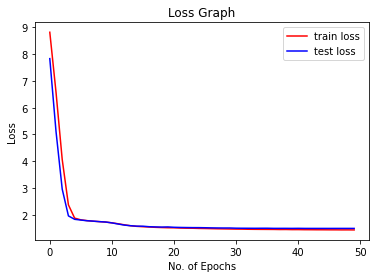

In [29]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

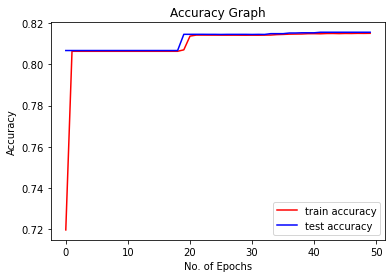

In [35]:
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [30]:
#enc_dec_model.evaluate([X_test,y_test[:,:-1]],y_test.reshape(y_test.shape[0],y_test.shape[1],1)[:,1:])
# Final evaluation of the model
scores = enc_dec_model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 1.4915237426757812
Accuracy: 0.8156220316886902


In [31]:
# Saving model and its weights for future use
import tensorflow
tensorflow.__version__
import tensorflow.keras.models
enc_dec_model.save('/content/drive/MyDrive/Colab Notebooks/Capstone/LSTM_withoutAttention.h5')
enc_dec_model.save_weights('/content/drive/MyDrive/Colab Notebooks/Capstone/LSTM_withoutAttention_weights.h5')

In [ ]:
'''
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/Colab Notebooks/Capstone/LSTM_withoutAttention.sav'
pickle.dump(enc_dec_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
'''

In [32]:
from tensorflow.keras.models import load_model

# Loading MobileNet
model_lstm_withoutattention = load_model('/content/drive/MyDrive/Colab Notebooks/Capstone/LSTM_withoutAttention.h5')


In [34]:
def logits_to_sentence(logits, tokenizer):

    index_to_words = {idx: word for word, idx in tokenizer.word_index.items()}
    index_to_words[0] = '<empty>' 

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

#index = 10
for index in range(200, 216):
    print("The english sentence is: {}".format(english_sentences[index]))
    print("The german sentence is: {}".format(german_sentences[index]))
    print('The predicted sentence is :')
    print(logits_to_sentence(enc_dec_model.predict(eng_pad_sentence[index:index+1])[0], german_text_tokenizer))
    print("BLEU Score:",sentence_bleu(german_sentences[index],logits_to_sentence(enc_dec_model.predict(eng_pad_sentence[index:index+1])[0], german_text_tokenizer),weights=(0.25,0.25,0.25,0.25)))


The english sentence is: just think of the road accidents which have occurred over recent years for example in belgium the netherlands and a number of other countries where lorries carrying dangerous goods continued to drive in foggy conditions when really they should have pulled off the road instead
The german sentence is: start denken sie an die unfälle die sich in den letzten jahren im straßenverkehr ereignet haben beispielsweise in belgien den niederlanden und weiteren ländern fuhren gefahrguttransporter trotz nebels weiter und wurden nicht wie es angesichts der umstände eigentlich erforderlich gewesen wäre am straßenrand abgestellt end
The predicted sentence is :
1/1 [==============================] - 0s 16ms/step
start start die die die die <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <em

1st, 2nd and 4th word predicted only